### **Simple SVD code for denoising github image**

In [93]:
#Installing kneed for elbow method
!pip install kneed

In [94]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [95]:
#The path to the file
path='/content/gdrive/MyDrive/FOR NEXA/SVD/GitHub.png'

In [96]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Text(0.5, 1.0, 'Original image in gray scale')

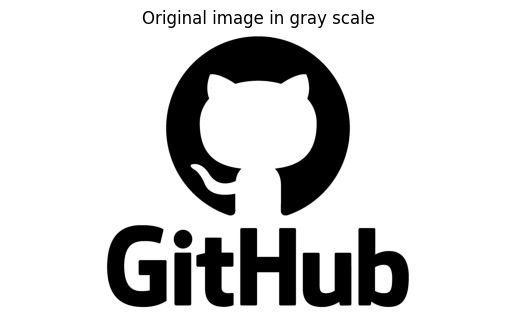

In [97]:
#Uploading and reading the image
image=img_as_float(color.rgb2gray(io.imread(path)))  #Reading the image with io.imreaad
                                                     #Convertinng the image to grayscale with color.rgb2gray
                                                     #Converting the image to float format with pixels scaled in the range of [0 , 1] with img_as_float
#Displaying the image in grayscale
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Original image in gray scale')

In [98]:
#Genration of white noise and adding it to the image
h , w=image.shape                          #gettting the shape of the image to generatee noise in the same dimensions
noise=0.05*np.random.randn(*image.shape)   #Noise generation
noisy_image=image+noise                    #Creation of the noisy image

Text(0.5, 1.0, 'Noisy image')

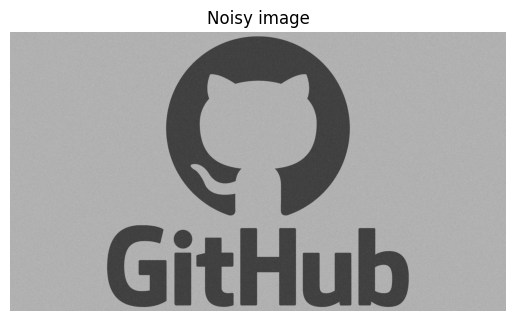

In [99]:
#Displaying the noisy image
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.title('Noisy image')

In [110]:
#Computing the signal to noise ratio of the noisy image
img_power=np.mean(image**2)               #The power of the pure clean image
noise_power=np.mean(noise**2)                #The power of the generated noise
snr_noisy_image=10*np.log10(img_power/noise_power)   #signal to noiise ratio of the noisy image
print(snr_noisy_image)

16.98572921260678


In [101]:
#Applying singular value decompostion
U, S, Vt=np.linalg.svd(noisy_image)

In [102]:
#Finding the top r_rank singularr values using elbow "knee" method
from kneed import KneeLocator
knee = KneeLocator(range(len(S)), S**2, curve='convex', direction='decreasing')  #Finding r energy starts diminishing significantly
r_knee = knee.knee
print(r_knee)

12


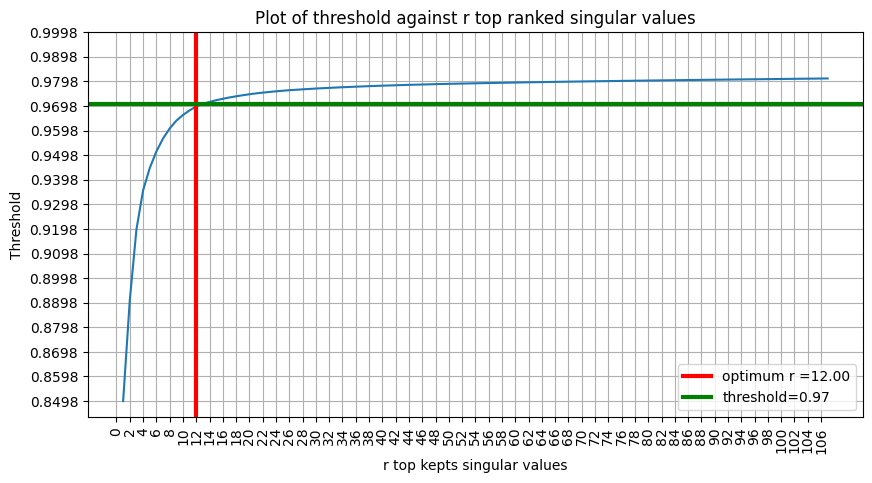

In [103]:
cumsum=np.cumsum(S**2)/np.sum(S**2)                 #Calculating cumsm normalized energy used for thresholding
R=np.arange(1 , len(S)//20, 1)                      #Defining the range of r top ranksingular values

#Plotting threshold against r to get the maximum energy kept decomposing using r_knee
plt.figure(figsize=(10 , 5))
plt.plot(R, cumsum[:len(R)])
plt.xticks(np.arange(0 , len(S)//20, 2 ), rotation=90)
plt.yticks(np.arange(min(cumsum) , max(cumsum) , 0.01))
plt.axvline(x=r_knee,label=f"optimum r ={r_knee:.2f}", color='r', lw=3 )
plt.axhline(cumsum[r_knee], label=f"threshold={cumsum[r_knee]:.2f}", color='g', lw=3)
plt.xlabel('r top kepts singular values')
plt.ylabel('Threshold')
plt.title('Plot of threshold against r top ranked singular values')
plt.grid(True)
plt.legend()

In [104]:
#Reconstructing filtered image using r_knee tor rank singular vaalues
filtered_image=U[: , :r_knee]@np.diag(S[:r_knee])@Vt[:r_knee, :]

Text(0.5, 1.0, 'Filtered image usingg SVD decomposition')

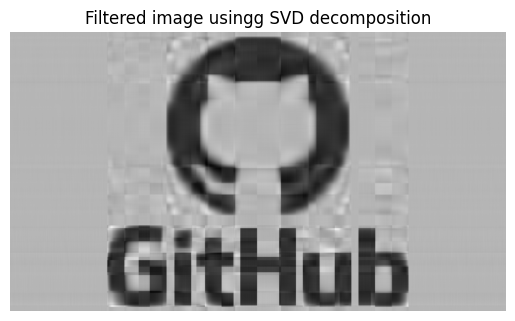

In [105]:
#Displaying the filtered image
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.title('Filtered image usingg SVD decomposition')

In [116]:
#Calculating signal to noise ratio for the filtered image
img_power=np.mean(image**2)                     #Clean image power
f_noise_power=np.mean((filtered_image-image)**2)  #The power of noise after filtering
snr_filtered=10*np.log10(img_power/f_noise_power)          #signal to noisee ratio of the filtered image
print(snr_filtered)

19.46481566004752


In [117]:
snr_gain=snr_filtered-snr_noisy_image
print(snr_gain)

2.4790864474407392


In [115]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(noisy_image, image)
mse2=mean_squared_error(filtered_image, image)
print(f"mse_noisy image={mse1:.3f} \nmse_filtered image={mse2:.3f}")

mse_noisy image=0.003 
mse_filtered image=0.001
